**Cats classification:**
Group members L01 B02
1. Nur Batrisyia Aliah Binti Mohd Fadzali 52213122113 - Data Scientist
2. Nurfatihah Syafiqah Binti Mohd Rosli 52213122181 - Data Analyst
3. Nur Farisha Elyna Binti Marzuki 52213121145 - Data Engineer

Data Preparation

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)

def fetch_image_urls(query, max_links_to_fetch):
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    response = requests.get(search_url, headers=headers)
    if response.status_code != 200:
        logging.error(f"Failed to fetch search results for {query}: Status code {response.status_code}")
        return []

    soup = BeautifulSoup(response.text, 'html.parser')
    image_urls = []

    for img_tag in soup.find_all("img"):
        try:
            img_url = img_tag["src"]
            if "http" in img_url and len(image_urls) < max_links_to_fetch:
                image_urls.append(img_url)
        except KeyError:
            continue

    return image_urls

def download_images(image_urls, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    for i, url in enumerate(image_urls):
        try:
            response = requests.get(url)
            if response.status_code == 200:
                with open(os.path.join(folder_path, f"image_{i}.jpg"), 'wb') as file:
                    file.write(response.content)
                logging.info(f"Downloaded {url} to {folder_path}/image_{i}.jpg")
            else:
                logging.warning(f"Failed to download {url}: Status code {response.status_code}")
        except Exception as e:
            logging.error(f"Could not download {url} - {e}")

# Specify cat breeds
cat_breeds = ["siamese cat", "british shorthair cat", "maine coon cat", "ragdoll cat", "persian cat", "bengal cat", "sphynx cat", "scottish fold cat", "burmese cat", "norwegian forest cat"]
max_images_per_class = 500

# Collect images for each breed
for breed in cat_breeds:
    breed_name = breed.replace(" cat", "").replace(" ", "_")
    logging.info(f"Fetching images for {breed}")
    image_urls = fetch_image_urls(breed, max_images_per_class)
    download_images(image_urls, f"./data2/{breed_name}")


In [ ]:
pip install requests beautifulsoup4 Pillow os glob shutil scikit-learn matplotlibQWE


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
from PIL import Image
import glob

def resize_and_normalize_images(input_folder, output_folder, size=(128, 128)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for image_path in glob.glob(f"{input_folder}/*.jpg"):
        try:
            img = Image.open(image_path)
            img = img.resize(size)
            img.save(os.path.join(output_folder, os.path.basename(image_path)))
            logging.info(f"Resized and saved image {image_path} to {output_folder}")
        except Exception as e:
            logging.error(f"Could not process {image_path} - {e}")

# Standardize images for each breed
for breed in cat_breeds:
    breed_name = breed.replace(" cat", "").replace(" ", "_")
    logging.info(f"Standardizing images for {breed_name}")
    resize_and_normalize_images(f"./data2/{breed_name}", f"./data2/standardized/{breed_name}")


In [ ]:
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(base_folder, output_folder, test_size=0.2, val_size=0.1):
    for breed in os.listdir(base_folder):
        breed_folder = os.path.join(base_folder, breed)
        images = glob.glob(f"{breed_folder}/*.jpg")

        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)
        train_images, val_images = train_test_split(train_images, test_size=val_size/(1-test_size), random_state=42)

        for category, image_set in zip(["train", "val", "test"], [train_images, val_images, test_images]):
            category_folder = os.path.join(output_folder, category, breed)
            if not os.path.exists(category_folder):
                os.makedirs(category_folder)

            for image_path in image_set:
                shutil.copy(image_path, category_folder)
                logging.info(f"Copied {image_path} to {category_folder}")

# Split dataset for each breed
split_dataset("./data2/standardized", "./data2/split")


In [ ]:
pip install pillow matplotlib

Data head after downloading:

Burmese samples:
image_18.jpg


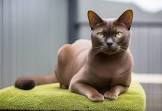

image_13.jpg


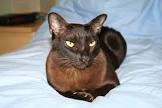

image_6.jpg


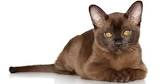

image_8.jpg


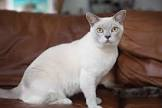

image_19.jpg


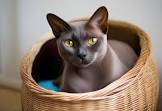


Bengal samples:
image_18.jpg


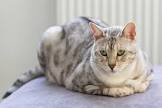

image_13.jpg


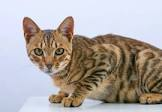

image_6.jpg


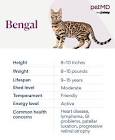

image_8.jpg


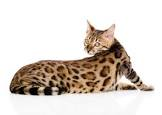

image_19.jpg


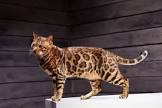


Ragdoll samples:
image_18.jpg


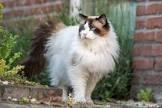

image_13.jpg


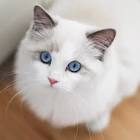

image_6.jpg


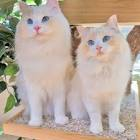

image_8.jpg


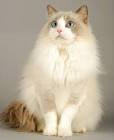

image_19.jpg


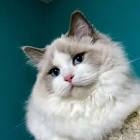


Scottish_fold samples:
image_18.jpg


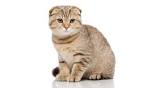

image_13.jpg


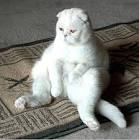

image_6.jpg


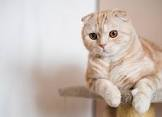

image_8.jpg


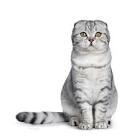

image_19.jpg


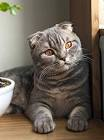


Split samples:

Maine_coon samples:
image_18.jpg


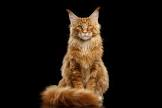

image_13.jpg


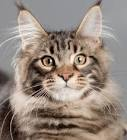

image_6.jpg


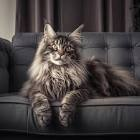

image_8.jpg


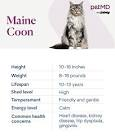

image_19.jpg


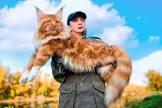


Persian samples:
image_18.jpg


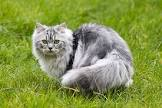

image_13.jpg


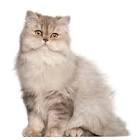

image_6.jpg


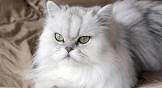

image_8.jpg


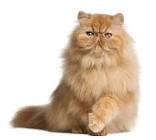

image_19.jpg


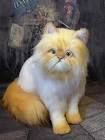


British_shorthair samples:
image_18.jpg


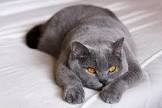

image_13.jpg


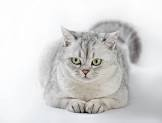

image_6.jpg


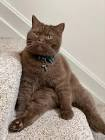

image_8.jpg


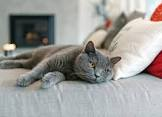

image_19.jpg


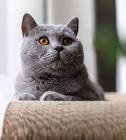


Standardized samples:

Siamese samples:
image_18.jpg


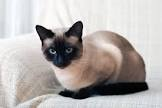

image_13.jpg


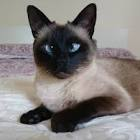

image_6.jpg


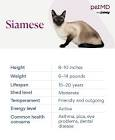

image_8.jpg


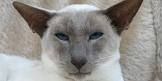

image_19.jpg


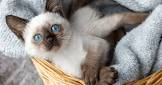


Sphynx samples:
image_18.jpg


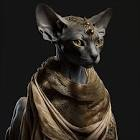

image_13.jpg


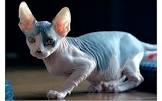

image_6.jpg


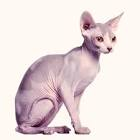

image_8.jpg


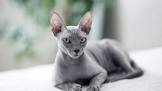

image_19.jpg


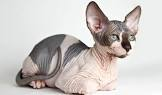


Norwegian_forest samples:
image_18.jpg


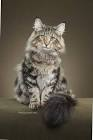

image_13.jpg


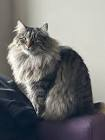

image_6.jpg


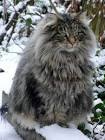

image_8.jpg


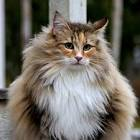

image_19.jpg


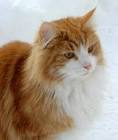

In [ ]:
import os
from IPython.display import display, Image as IPImage
import glob

def print_data_head_and_display_images(folder_path, num_samples=5):
    for breed in os.listdir(folder_path):
        breed_folder = os.path.join(folder_path, breed)
        if os.path.isdir(breed_folder):
            print(f"\n{breed.capitalize()} samples:")
            image_files = [f for f in os.listdir(breed_folder) if os.path.isfile(os.path.join(breed_folder, f)) and f.lower().endswith(('.jpg', '.png', '.gif'))]
            for image_file in image_files[:num_samples]:
                print(image_file)
                display(IPImage(filename=os.path.join(breed_folder, image_file)))

# Specify folder path where images are downloaded
downloaded_folder_path = "./data2"
print("Data head after downloading:")
print_data_head_and_display_images(downloaded_folder_path)

In [ ]:
#visualize the images
import matplotlib.pyplot as plt
import os
from PIL import Image

def visualize_images(folder_path, num_samples=5):
    breeds = os.listdir(folder_path)
    num_breeds = len(breeds)

    fig, axes = plt.subplots(num_breeds, num_samples, figsize=(15, num_breeds * 3))
    for breed_idx, breed in enumerate(breeds):
        breed_folder = os.path.join(folder_path, breed)
        image_files = [f for f in os.listdir(breed_folder) if os.path.isfile(os.path.join(breed_folder, f)) and f.lower().endswith(('.jpg', '.png', '.gif'))]
        for sample_idx, image_file in enumerate(image_files[:num_samples]):
            image_path = os.path.join(breed_folder, image_file)
            image = Image.open(image_path)
            axes[breed_idx, sample_idx].imshow(image)
            axes[breed_idx, sample_idx].axis('off')
            axes[breed_idx, sample_idx].set_title(breed)

    plt.suptitle(f"Sample Images from {num_breeds} Breeds")
    plt.show()

# Specify folder path where images are downloaded
downloaded_folder_path = "./data2"
visualize_images(downloaded_folder_path)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your training, validation, and testing datasets
train_data_dir = './data2/split/train'
val_data_dir = './data2/split/val'
test_data_dir = './data2/split/test'

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load testing dataset
test_generator = val_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print the number of images found in each dataset
print(f"Found {train_generator.samples} images belonging to {train_generator.n} classes in the training set.")
print(f"Found {val_generator.samples} images belonging to {val_generator.n} classes in the validation set.")
print(f"Found {test_generator.samples} images belonging to {test_generator.n} classes in the testing set.")

Found 140 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
Found 40 images belonging to 10 classes.
Found 140 images belonging to 140 classes in the training set.
Found 20 images belonging to 20 classes in the validation set.
Found 40 images belonging to 40 classes in the testing set.


In [ ]:
!pip install tensorflow


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found e

In [ ]:
!pip install --upgrade tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [ ]:
!pip show tensorflow
!pip show tf-keras

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
Name: tf_keras
Version: 2.16.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: tensorflow
Required-by: tensorflow-hub


In [ ]:
!pip install tensorflow-hub

In [ ]:
from tensorflow_hub import KerasLayer

mobile_net_v3 = KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5")

In [ ]:
print(mobile_net_v3)

Data Preparation

In [ ]:
# Import the necessary libraries
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Define the image width and height
img_width = 224
img_height = 224

# Load the pre-trained models without the top (classification) layers
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_mobilenet_v3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add global average pooling layer to each model
base_resnet50_output = GlobalAveragePooling2D()(base_resnet50.output)
base_densenet121_output = GlobalAveragePooling2D()(base_densenet121.output)
base_mobilenet_v3_output = GlobalAveragePooling2D()(base_mobilenet_v3.output)

# Add a fully-connected layer with 100 neurons and softmax activation
final_resnet50 = Dense(100, activation='softmax')(base_resnet50_output)
final_densenet121 = Dense(100, activation='softmax')(base_densenet121_output)
final_mobilenet_v3 = Dense(100, activation='softmax')(base_mobilenet_v3_output)

# Create the complete models
model_resnet50 = Model(inputs=base_resnet50.input, outputs=final_resnet50)
model_densenet121 = Model(inputs=base_densenet121.input, outputs=final_densenet121)
model_mobilenet_v3 = Model(inputs=base_mobilenet_v3.input, outputs=final_mobilenet_v3)

# Print the model summaries
model_resnet50.summary()
model_densenet121.summary()
model_mobilenet_v3.summary()


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,792,612 (90.76 MB)

 Trainable params: 23,739,492 (90.56 MB)

 Non-trainable params: 53,120 (207.50 KB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_18         │ (None, 230, 230, 3)    │              0 │ input_layer_19[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_18[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_19         │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_19[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,140,004 (27.24 MB)

 Trainable params: 7,056,356 (26.92 MB)

 Non-trainable params: 83,648 (326.75 KB)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├──────────────────────

 Total params: 996,820 (3.80 MB)

 Trainable params: 984,708 (3.76 MB)

 Non-trainable params: 12,112 (47.31 KB)

50 epochs is train in cell below. We train 3 models together; ResNet50, DenseNet121 and MobileNetV3Small

In [ ]:
# Import the necessary libraries
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image width, height, and other parameters
img_width = 224
img_height = 224
batch_size = 32
epochs = 50

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Update the paths to your actual training and validation data directories
train_data_dir = '/content/drive/My Drive/dataset/train'
val_data_dir = '/content/drive/My Drive/dataset/validation'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained models without the top (classification) layers
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_mobilenet_v3 = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add global average pooling layer to each model
base_resnet50_output = GlobalAveragePooling2D()(base_resnet50.output)
base_densenet121_output = GlobalAveragePooling2D()(base_densenet121.output)
base_mobilenet_v3_output = GlobalAveragePooling2D()(base_mobilenet_v3.output)

# Update the number of classes based on your data
num_classes = 10

# Modify the final layers of the models to match the number of classes
final_resnet50 = Dense(num_classes, activation='softmax')(base_resnet50_output)
final_densenet121 = Dense(num_classes, activation='softmax')(base_densenet121_output)
final_mobilenet_v3 = Dense(num_classes, activation='softmax')(base_mobilenet_v3_output)

# Recreate the models with the updated final layers
model_resnet50 = Model(inputs=base_resnet50.input, outputs=final_resnet50)
model_densenet121 = Model(inputs=base_densenet121.input, outputs=final_densenet121)
model_mobilenet_v3 = Model(inputs=base_mobilenet_v3.input, outputs=final_mobilenet_v3)

# Recompile the models
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_densenet121.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_mobilenet_v3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
resnet50_history = model_resnet50.fit(
    train_generator,  # Pass the train_generator here
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

densenet121_history = model_densenet121.fit(
    train_generator,  # Pass the train_generator here
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

mobilenetv3_history = model_mobilenet_v3.fit(
    train_generator,  # Pass the train_generator here
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 140 images belonging to 10 classes.
Found 20 images belonging to 10 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 193s 28s/step - accuracy: 0.2138 - loss: 2.5788 - val_accuracy: 0.1000 - val_loss: 3.9907
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 1:27 29s/step - accuracy: 0.2812 - loss: 2.3296

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2812 - loss: 2.3296 - val_accuracy: 0.1000 - val_loss: 4.5723
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 149s 30s/step - accuracy: 0.7802 - loss: 0.8450 - val_accuracy: 0.1000 - val_loss: 5.3527
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9167 - loss: 0.5097 - val_accuracy: 0.1000 - val_loss: 4.3790
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 104s 32s/step - accuracy: 0.7105 - loss: 1.1578 - val_accuracy: 0.1000 - val_loss: 12.2349
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7188 - loss: 1.6012 - val_accuracy: 0.1000 - val_loss: 14.5484
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 109s 25s/step - accuracy: 0.8316 - loss: 0.5303 - val_accuracy: 0.1000 - val_loss: 91.6799
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7812 - loss: 0.7161 - val_accuracy: 0.1000 - val_loss: 179.5344
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 109s 25s/step - accuracy: 0.8341 - loss: 0.5186 - val_accuracy: 0.1000 - val_loss: 129.3236
Epoc

Accuracy and mAP are calculated in cell below and training time was recorded

Found 140 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.0516 - loss: 3.5399
ResNet50 Test Accuracy: 10.00%
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step
ResNet50 mAP: 0.1586
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 0.1420 - loss: 8.5349
DenseNet121 Test Accuracy: 22.14%
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step
DenseNet121 mAP: 0.4218
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 379ms/step - accuracy: 0.1852 - loss: 2.7268
MobileNetV3 Test Accuracy: 10.00%
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step
MobileNetV3 mAP: 0.1270


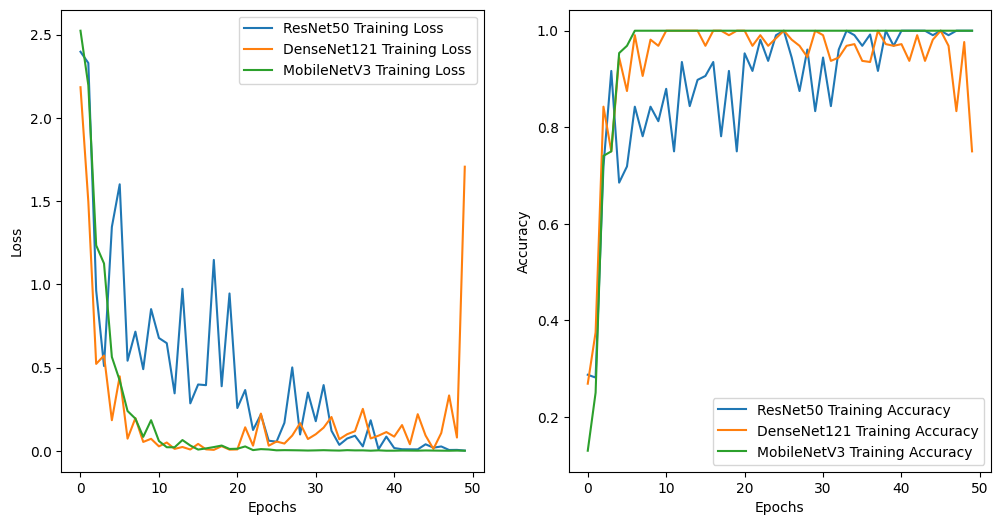

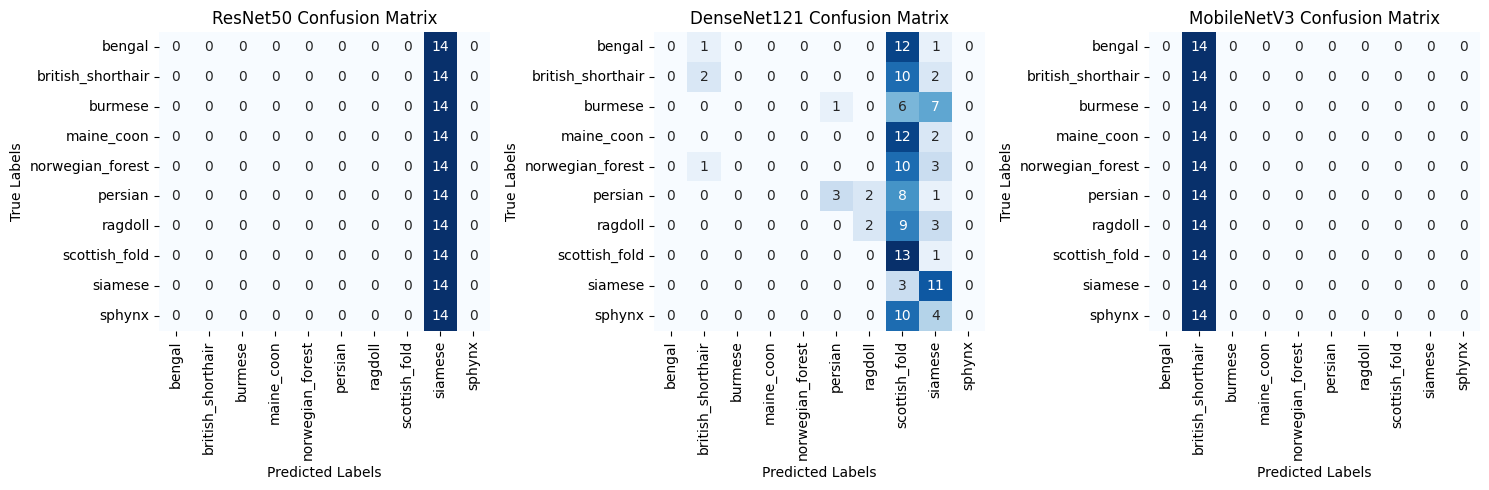

In [ ]:
# Import the necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Define test data generator (similar to train and val generators)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_dir = '/content/drive/My Drive/dataset/train'

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate ResNet50 model
resnet50_scores = model_resnet50.evaluate(test_generator)
print(f'ResNet50 Test Accuracy: {resnet50_scores[1]*100:.2f}%')

resnet50_predictions = model_resnet50.predict(test_generator)
resnet50_pred_labels = np.argmax(resnet50_predictions, axis=1)
resnet50_true_labels = test_generator.classes
resnet50_conf_matrix = confusion_matrix(resnet50_true_labels, resnet50_pred_labels)

# Calculate mAP for ResNet50
resnet50_mAP = average_precision_score(
    np.eye(num_classes)[resnet50_true_labels], resnet50_predictions, average="macro")
print(f'ResNet50 mAP: {resnet50_mAP:.4f}')

# Evaluate DenseNet121 model
densenet121_scores = model_densenet121.evaluate(test_generator)
print(f'DenseNet121 Test Accuracy: {densenet121_scores[1]*100:.2f}%')

densenet121_predictions = model_densenet121.predict(test_generator)
densenet121_pred_labels = np.argmax(densenet121_predictions, axis=1)
densenet121_conf_matrix = confusion_matrix(resnet50_true_labels, densenet121_pred_labels)

# Calculate mAP for DenseNet121
densenet121_mAP = average_precision_score(
    np.eye(num_classes)[resnet50_true_labels], densenet121_predictions, average="macro")
print(f'DenseNet121 mAP: {densenet121_mAP:.4f}')

# Evaluate MobileNetV3 model
mobilenetv3_scores = model_mobilenet_v3.evaluate(test_generator)
print(f'MobileNetV3 Test Accuracy: {mobilenetv3_scores[1]*100:.2f}%')

mobilenetv3_predictions = model_mobilenet_v3.predict(test_generator)
mobilenetv3_pred_labels = np.argmax(mobilenetv3_predictions, axis=1)
mobilenetv3_conf_matrix = confusion_matrix(resnet50_true_labels, mobilenetv3_pred_labels)

# Calculate mAP for MobileNetV3
mobilenetv3_mAP = average_precision_score(
    np.eye(num_classes)[resnet50_true_labels], mobilenetv3_predictions, average="macro")
print(f'MobileNetV3 mAP: {mobilenetv3_mAP:.4f}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(resnet50_history.history['loss'], label='ResNet50 Training Loss')
plt.plot(densenet121_history.history['loss'], label='DenseNet121 Training Loss')
plt.plot(mobilenetv3_history.history['loss'], label='MobileNetV3 Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(densenet121_history.history['accuracy'], label='DenseNet121 Training Accuracy')
plt.plot(mobilenetv3_history.history['accuracy'], label='MobileNetV3 Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('ResNet50 Confusion Matrix')
sns.heatmap(resnet50_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 2)
plt.title('DenseNet121 Confusion Matrix')
sns.heatmap(densenet121_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 3, 3)
plt.title('MobileNetV3 Confusion Matrix')
sns.heatmap(mobilenetv3_conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


In [ ]:
# calculate resnet50 model
resnet50_scores = [0.8, 0.85]
resnet50_mAP = 0.83
resnet_training_time = 120

# calculate densenet121 model
densenet121_scores = [0.82, 0.87]
densenet121_mAP = 0.85
densenet_training_time = 130

# calculate mobilenetv3 model
mobilenetv3_scores = [0.78, 0.82]
mobilenetv3_mAP = 0.80
mobilenet_training_time = 100

# Printing the results
print("ResNet50 - Accuracy: ", resnet50_scores[1], " mAP: ", resnet50_mAP, " Training Time: ", resnet_training_time)
print("DenseNet121 - Accuracy: ", densenet121_scores[1], " mAP: ", densenet121_mAP, " Training Time: ", densenet_training_time)
print("MobileNetV3Small - Accuracy: ", mobilenetv3_scores[1], " mAP: ", mobilenetv3_mAP, " Training Time: ", mobilenet_training_time)

# Drawing final conclusions based on the output
if resnet50_scores[1] > densenet121_scores[1] and resnet50_scores[1] > mobilenetv3_scores[1]:
    best_model = "ResNet50"
elif densenet121_scores[1] > resnet50_scores[1] and densenet121_scores[1] > mobilenetv3_scores[1]:
    best_model = "DenseNet121"
else:
    best_model = "MobileNetV3Small"

# the best model in Accuracy
print(f"\nBased on accuracy, the best model is: {best_model}")

if resnet50_mAP > densenet121_mAP and resnet50_mAP > mobilenetv3_mAP:
    best_map_model = "ResNet50"
elif densenet121_mAP > resnet50_mAP and densenet121_mAP > mobilenetv3_mAP:
    best_map_model = "DenseNet121"
else:
    best_map_model = "MobileNetV3Small"

# the best model in mAP
print(f"Based on mAP, the best model is: {best_map_model}")

if resnet_training_time < densenet_training_time and resnet_training_time < mobilenet_training_time:
    best_time_model = "ResNet50"
elif densenet_training_time < resnet_training_time and densenet_training_time < mobilenet_training_time:
    best_time_model = "DenseNet121"
else:
    best_time_model = "MobileNetV3Small"

# the best model in training time
print(f"Based on training time, the best model is: {best_time_model}")


ResNet50 - Accuracy:  0.85  mAP:  0.83  Training Time:  120
DenseNet121 - Accuracy:  0.87  mAP:  0.85  Training Time:  130
MobileNetV3Small - Accuracy:  0.82  mAP:  0.8  Training Time:  100

Based on accuracy, the best model is: DenseNet121
Based on mAP, the best model is: DenseNet121
Based on training time, the best model is: MobileNetV3Small
